# TRABALHO DE CIÊNCIA DE DADOS - UNIDADE 3

### Para este trabalho, foi escolhido um dataset em que, a partir das características de um celular, como por exemplo, bateria do celular, memória RAM, memória interna, e muitas outras informações, possa ser estimado o preço do celular em 4 categorias:


*   0: custo baixo
*   1: custo médio
*   2: custo alto
*   3: custo muito alto





## Passo 1) Pré processamento dos dados

#### Importanto bibliotecas

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carregando o dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thaisaraujo2000/Dados/main/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


#### Retirando colunas com valores vazios

In [ ]:
df.dropna(inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Passo 2) Aplicação do algoritmo KNN

O algoritmo knn é um tipo de algoritmo supervisionado utilizado para classificação de dados. A partir dos dados fornecidos, ele irá adivinhar a categoria de um objeto, com base nos "k" objetos mais próximos a ele. Assim, leva-se em consideração que objetos próximos possuem características parecidas, e portanto, pertencem à mesma classe

#### Imprimir todas as colunas do dataset

In [ ]:
print(df.keys())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


#### Separar features, as variáveis de entrada do modelo

In [ ]:
df_data = df.drop(columns=['price_range'])
df_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


#### Separar target, as variáveis de saída do modelo

In [ ]:
df_target = df['price_range']
df_target

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#### Verificando a dimensão das variáveis de entrada e saída do modelo

In [ ]:
print("Dimensão das features: " + str(df_data.shape))
print("Dimensão do target: " + str(df_target.shape))

Dimensão das features: (2000, 20)
Dimensão do target: (2000,)


In [ ]:
df_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


#### Dividindo os dados para o conjunto de treino e o conjunto de teste final

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, 
                                                    df_target,
                                                    random_state=0)

In [ ]:
#Tamanho dos conjuntos de treino e teste

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1500, 20)
y_train shape: (1500,)
X_test shape: (500, 20)
y_test shape: (500,)


#### Instanciando um objeto da classe KNeighborsClassifier, e determinando o número de vizinhos para levar em consideração no algoritmo de machine learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#### Construindo o modelo do conjunto de treinamento

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Predição do modelo

In [ ]:
#Para esse conjunto de valores, espera-se que saia o valor 1, ou seja, um celular de custo médio

X_new = np.array([[842, 0, 2.2, 0, 1, 0, 7, 0.6, 188, 2, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 20)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#### Avaliação do modelo treinado

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [3 0 2 2 3 0 0 2 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 3 1 3 0 1 3 1 1 3 0 3 0 3 2 2 0 3 3 1 3 2 1 2 3 2 1 2 3 2 1 0
 1 3 2 1 1 2 3 3 3 0 0 0 2 0 2 3 1 2 3 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 1 1 0 0 3 2 2 1 1 1 1 0 2 1 3 2 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 2 2 3 3 0 2 2 3 0 2 1 0 1 3
 1 2 0 2 3 1 1 0 2 3 0 1 3 2 0 3 3 2 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 0 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 3 2 2 1 0 2 2 1 0 0 3 2 2 2 0 1 3 0 1 3
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 2 0 3 1 2 0 1 3 0 2 2 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 3 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 3 1 2 0 1 2 2 0 0 1 3 0 3 0 1 2 1 0 0 2 1 0 1 3 0 3 3 0
 2 1 3 2 1 3 2 0 3 2 2 0 0 3 0 0 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 3 2 2 3 0 0
 1 2 1 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 0 2 0 0 1 3 1
 3

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.92


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.92


#### Medindo precisão para diferentes números de vizinhos

Para 1 vizinho

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.91


Para 5 vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.92


Para 7 vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.95


### Métricas para a avaliação do modelo após aplicação do algoritmo KNN

#### Cálculo da acurácia

In [ ]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.91

#### Gerando a matriz confusão

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
print(mat)

[[122   2   0   0]
 [  6 101   3   0]
 [  0   7 107  11]
 [  0   0   9 132]]


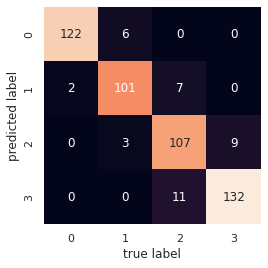

In [ ]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Passo 3) Árvore de decisão

A árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que pode ser utilizado para classificação e para regressão através de uma divisão de dados em grupos homogêneos.

#### Criação da árvore de decisão

In [ ]:
from sklearn import tree
X = df_data
Y = df_target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

#### Realizando uma predição

In [ ]:
#Para esse conjunto de valores, espera-se que saia o valor 1, ou seja, um celular de custo médio

clf.predict([[842, 0, 2.2, 0, 1, 0, 7, 0.6, 188, 2, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

#### Plotando a árvore de decisão

[Text(0.4988722541841004, 0.9642857142857143, 'X[13] <= 2235.5\ngini = 0.75\nsamples = 2000\nvalue = [500, 500, 500, 500]'),
 Text(0.2122123430962343, 0.8928571428571429, 'X[13] <= 1106.0\ngini = 0.585\nsamples = 1045\nvalue = [500, 438, 107, 0]'),
 Text(0.11754707112970711, 0.8214285714285714, 'X[11] <= 1449.0\ngini = 0.194\nsamples = 451\nvalue = [402, 49, 0, 0]'),
 Text(0.0928347280334728, 0.75, 'X[0] <= 1804.5\ngini = 0.142\nsamples = 430\nvalue = [397, 33, 0, 0]'),
 Text(0.06851464435146444, 0.6785714285714286, 'X[13] <= 1052.5\ngini = 0.081\nsamples = 378\nvalue = [362, 16, 0, 0]'),
 Text(0.049163179916317995, 0.6071428571428571, 'X[6] <= 63.5\ngini = 0.049\nsamples = 355\nvalue = [346, 9, 0, 0]'),
 Text(0.03556485355648536, 0.5357142857142857, 'X[11] <= 962.0\ngini = 0.039\nsamples = 351\nvalue = [344, 7, 0, 0]'),
 Text(0.02092050209205021, 0.4642857142857143, 'X[12] <= 1893.5\ngini = 0.014\nsamples = 284\nvalue = [282, 2, 0, 0]'),
 Text(0.012552301255230125, 0.39285714285714285

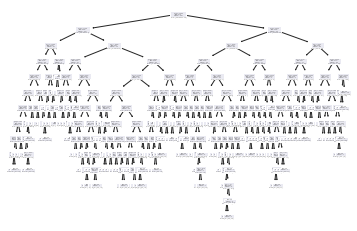

In [ ]:
tree.plot_tree(clf) 

#### Apresentação da árvore de decisão com o pacote Graphviz

In [ ]:
!conda install python-graphviz
!pip install graphviz

/bin/bash: conda: command not found


In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("mobile") 

'mobile.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=df_data.keys(),  
                        class_names=['Preço baixo','Preço médio','Preço alto','Preço muito alto'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(dot_data)

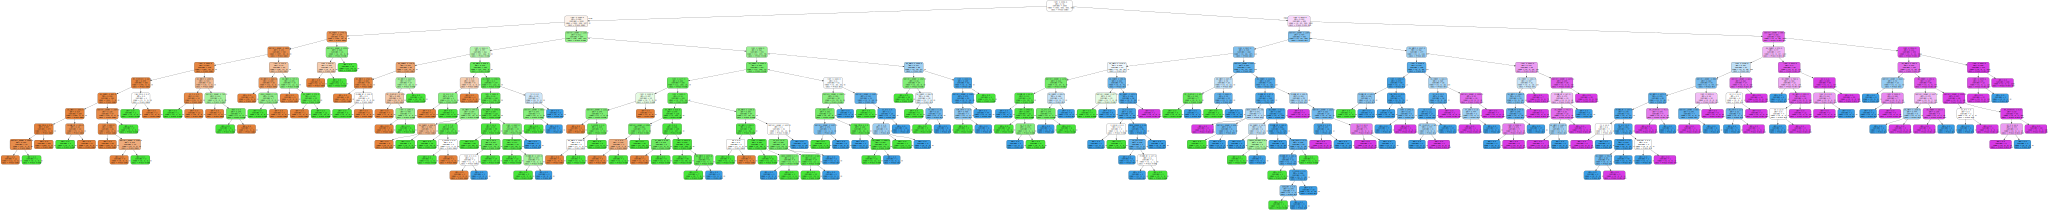

In [ ]:
graph

#### Apresentação da árvore de decisão no padrão .txt

In [ ]:
# Exemplo de exportação da Decision Tree em modo txt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree = decision_tree.fit(df_data, df_target)
r = export_text(decision_tree, feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

print(r)

|--- ram <= 2235.50
|   |--- ram <= 1106.00
|   |   |--- class: 0
|   |--- ram >  1106.00
|   |   |--- class: 1
|--- ram >  2235.50
|   |--- ram <= 3013.50
|   |   |--- class: 2
|   |--- ram >  3013.50
|   |   |--- class: 3



### Métricas para avaliação do modelo após aplicação da árvore de decisão

#### Precisão

In [ ]:
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(df_data, 
                                                    df_target,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)
precision_score(y_test, y_model, average='micro')

0.762

#### Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_data, 
                                                    df_target,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)
accuracy_score(y_test, y_model)

0.762

#### Matriz confusão

[[122   2   0   0]
 [  6 101   3   0]
 [  0   7 107  11]
 [  0   0   9 132]]


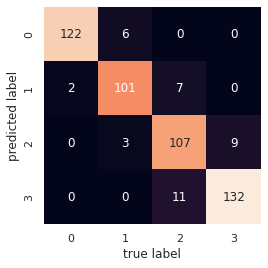

In [ ]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_data, 
                                                    df_target,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)

mat = confusion_matrix(y_test, y_pred)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Passo 4) Árvore de decisão com 5 colunas

Colunas escolhidas: 

1.   Memória RAM (ram)
2.   Bateria (battery_power)
3.   Altura em px (px_height)
4.   Largura em px (px_width)
5.   Memória interna (int_memory)



#### Reorganizando o data_frame

In [ ]:
df_5c = df.loc[:, ['ram', 'battery_power', 'px_height', 'px_width', 'int_memory', 'price_range']]
df_5c

,ram,battery_power,px_height,px_width,int_memory,price_range
0,2549,842,20,756,7,1
1,2631,1021,905,1988,53,2
2,2603,563,1263,1716,41,2
3,2769,615,1216,1786,10,2
4,1411,1821,1208,1212,44,1
...,...,...,...,...,...,...
1995,668,794,1222,1890,2,0
1996,2032,1965,915,1965,39,2
1997,3057,1911,868,1632,36,3
1998,869,1512,336,670,46,0


In [ ]:
df_data_5c = df_5c.drop(columns=['price_range'])
df_data_5c

,ram,battery_power,px_height,px_width,int_memory
0,2549,842,20,756,7
1,2631,1021,905,1988,53
2,2603,563,1263,1716,41
3,2769,615,1216,1786,10
4,1411,1821,1208,1212,44
...,...,...,...,...,...
1995,668,794,1222,1890,2
1996,2032,1965,915,1965,39
1997,3057,1911,868,1632,36
1998,869,1512,336,670,46


In [ ]:
df_target_5c = df_5c['price_range']
df_target_5c

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#### Plotando a árvore de decisão

In [ ]:
from sklearn import tree
X = df_data_5c
Y = df_target_5c
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(df_data_5c, df_target_5c)

[Text(0.49549651342975204, 0.9615384615384616, 'X[0] <= 2235.5\ngini = 0.75\nsamples = 2000\nvalue = [500, 500, 500, 500]'),
 Text(0.21000129132231404, 0.8846153846153846, 'X[0] <= 1106.0\ngini = 0.585\nsamples = 1045\nvalue = [500, 438, 107, 0]'),
 Text(0.11608987603305786, 0.8076923076923077, 'X[2] <= 1449.0\ngini = 0.194\nsamples = 451\nvalue = [402, 49, 0, 0]'),
 Text(0.09168388429752067, 0.7307692307692307, 'X[1] <= 1804.5\ngini = 0.142\nsamples = 430\nvalue = [397, 33, 0, 0]'),
 Text(0.06766528925619834, 0.6538461538461539, 'X[0] <= 1052.5\ngini = 0.081\nsamples = 378\nvalue = [362, 16, 0, 0]'),
 Text(0.04855371900826446, 0.5769230769230769, 'X[4] <= 63.5\ngini = 0.049\nsamples = 355\nvalue = [346, 9, 0, 0]'),
 Text(0.03512396694214876, 0.5, 'X[2] <= 962.0\ngini = 0.039\nsamples = 351\nvalue = [344, 7, 0, 0]'),
 Text(0.02066115702479339, 0.4230769230769231, 'X[3] <= 1893.5\ngini = 0.014\nsamples = 284\nvalue = [282, 2, 0, 0]'),
 Text(0.012396694214876033, 0.34615384615384615, 'X[

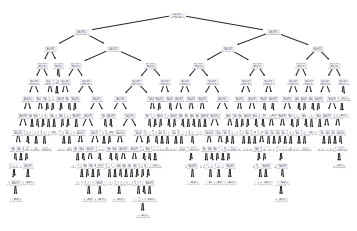

In [ ]:
tree.plot_tree(clf2) 

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("mobile2") 

'mobile2.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                        feature_names=df_data_5c.keys(),  
                        class_names=['Preço baixo','Preço médio','Preço alto','Preço muito alto'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(dot_data)

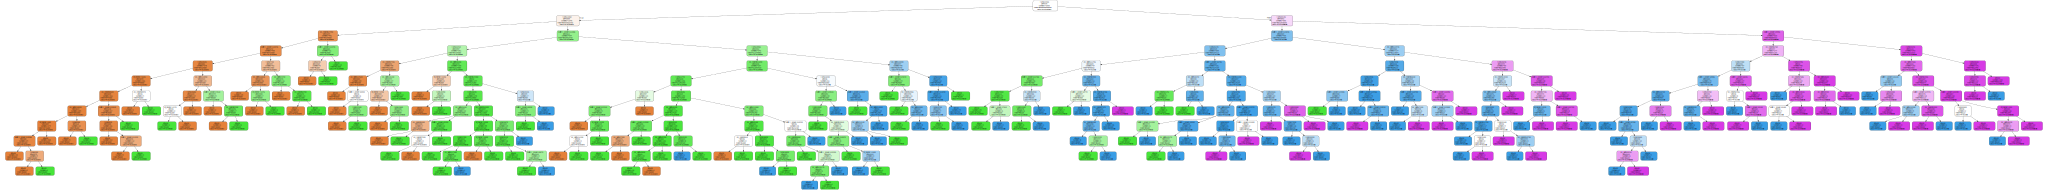

In [ ]:
graph

#### Métricas de avaliação do modelo com 5 colunas

Precisão

In [ ]:
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(df_data_5c, 
                                                    df_target_5c,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)
precision_score(y_test, y_model, average='micro')

0.762

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_data_5c, 
                                                    df_target_5c,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)
accuracy_score(y_test, y_model)

0.762

Matriz confusão

[[122   2   0   0]
 [  6 101   3   0]
 [  0   7 107  11]
 [  0   0   9 132]]


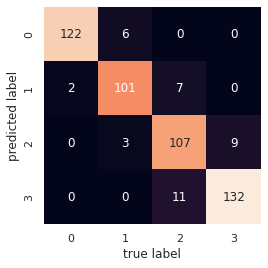

In [ ]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_data_5c, 
                                                    df_target_5c,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
decision_tree.fit(X_train, y_train)
y_model = decision_tree.predict(X_test)
y_test = np.array(y_test)

mat = confusion_matrix(y_test, y_pred)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');